In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv("C:/Users/Electronica Care/Desktop/Project/cleaned_sentiment_dataset.csv")
df.head()


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
X = df[['Retweets']]  
y = df['Likes']       


data = pd.concat([X, y], axis=1).dropna()
X = data[['Retweets']]
y = data['Likes']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X_test)


In [7]:
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient: 1.9914956020770804
Intercept: 0.08280203572457623


In [8]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.9954241661235723
Mean Squared Error: 0.812629966369317


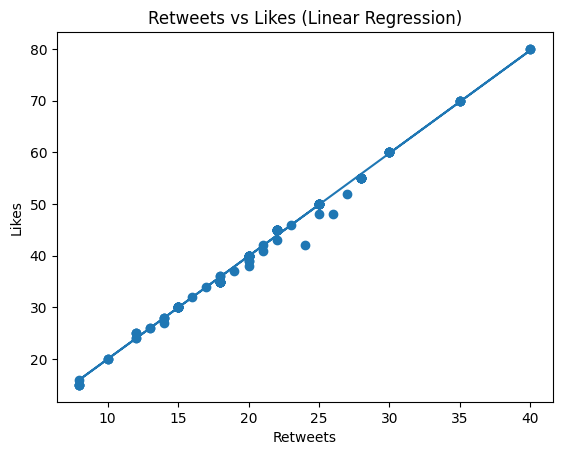

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.title("Retweets vs Likes (Linear Regression)")
plt.show()
